In [41]:
import numpy as np
import pandas as pd
import io

In [42]:
from google.colab import files

upload = files.upload()

Saving Live.csv to Live (1).csv


In [51]:
df = pd.read_csv("Live (1).csv")

In [52]:
|df.head()

SyntaxError: invalid syntax (<ipython-input-52-d90b1f72df33>, line 1)

In [53]:
df.shape

(7050, 16)

In [54]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

In [55]:
df.drop(columns=['Column1','Column2','Column3','Column4'],inplace= True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


# look for a column based on which wwe can cluster the dataset

In [57]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys'],
      dtype='object')

In [58]:
df['status_id'].nunique() # wwe can not make this column as the clustering basis ds

6997

In [59]:
df.drop(columns=['status_id'],inplace= True)

In [60]:
df['status_type'].nunique()

4

In [61]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [62]:
df.drop(columns =['status_published'],inplace= True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [64]:
X = df
y = df['status_type']

In [65]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])
y = le.transform(y)

In [66]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


In [67]:
X_cols = X.columns

## Transformationn of the data so that it will bring it to same level it makes calculation faster and easy since we are using eclidian dustance in this algorithm

In [68]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

X_trans = ms.fit_transform(X)

In [69]:
X = pd.DataFrame(X_trans , columns= X_cols)

In [70]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


# Now let's find out the optimal Clustring value for the Algorithm

In [71]:
from sklearn.cluster import KMeans

ks = KMeans(n_clusters = 2,n_init=1,random_state = 2)

In [72]:
ks.fit(X)

KMeans(n_clusters=2, n_init=1, random_state=2)

In [75]:
labels = ks.labels_

In [79]:
corect_labels  = sum(labels == y)
print("out of {} samples , only {} is classified corectly".format(y.shape[0],corect_labels))

out of 7050 samples , only 63 is classified corectly


In [86]:
# Accuracy of the model
print("the model accuracy is ",np.round((corect_labels/ float(y.size)),4))

the model accuracy is  0.0089


In [89]:
wcss = []

for i in range(1,11):
  kms = KMeans(n_clusters= i , n_init= 10 )
  kms.fit_predict(X)
  wcss.append(kms.inertia_)

In [90]:
import matplotlib.pyplot as plt


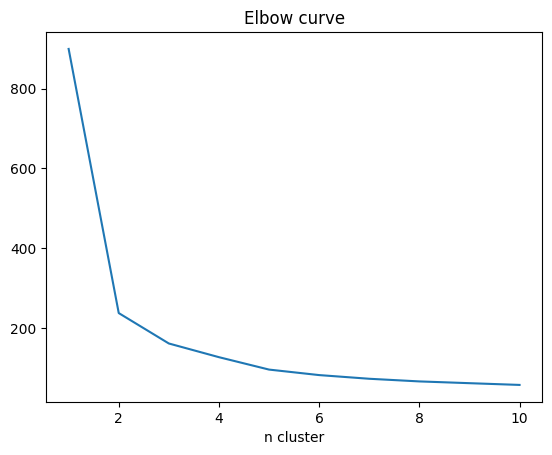

In [91]:
plt.plot(range(1,11),wcss)
plt.title("Elbow curve")
plt.xlabel("n cluster")
plt.show()


In [107]:
kms = KMeans(n_clusters= 5, n_init = 1 , random_state =2)

In [108]:
kms.fit(X)

KMeans(n_clusters=5, n_init=1, random_state=2)

In [109]:
y_pred  = kms.labels_

In [110]:
corect_laebls = sum(y == y_pred)
corect_laebls

276